In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []



processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/base_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len)
task_list.append(ner_task)

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/base_chinese_L-12_H-768_A-12/")
allu_class_task = AlluClassTask(processor,
                                "./allusion_corpus",
                                poem_seq_len)
task_list.append(allu_class_task)

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/base_chinese_L-12_H-768_A-12/")
allu_source_task = AlluSourceTask(processor,
                                  "./allusion_corpus",
                                  poem_seq_len,
                                  num_samples=50000)
task_list.append(allu_source_task)

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/base_chinese_L-12_H-768_A-12/")
readability_task = ReadabilityTask(processor,
                                   "./allusion_corpus",
                                   poem_seq_len)
task_list.append(readability_task)


Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:05:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:133]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training

Epoch 1/50
387/387 [==============================] - 263s 680ms/step - task_name: READABILITY - loss: 0.9501 - accuracy: 0.5668 - val_loss: 0.8160 - val_accuracy: 0.6406


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
387/387 [==============================] - 107s 277ms/step - task_name: READABILITY - loss: 0.6286 - accuracy: 0.6406 - val_loss: 0.8112 - val_accuracy: 0.6484


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
387/387 [==============================] - 108s 278ms/step - task_name: READABILITY - loss: 0.8200 - accuracy: 0.6816 - val_loss: 0.8308 - val_accuracy: 0.6562


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
387/387 [==============================] - 110s 284ms/step - task_name: READABILITY - loss: 0.6573 - accuracy: 0.6694 - val_loss: 0.7905 - val_accuracy: 0.6562


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
386/387 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.3245 - accuracy: 0.8414
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 112s 289ms/step - task_name: READABILITY - loss: 0.7005 - accuracy: 0.7010 - val_loss: 0.8115 - val_accuracy: 0.6328


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
387/387 [==============================] - 109s 282ms/step - task_name: READABILITY - loss: 0.7122 - accuracy: 0.7246 - val_loss: 0.8233 - val_accuracy: 0.6641


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
387/387 [==============================] - 108s 280ms/step - task_name: READABILITY - loss: 0.9080 - accuracy: 0.7156 - val_loss: 0.8233 - val_accuracy: 0.6523


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
386/387 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.1006 - accuracy: 0.8449
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 111s 286ms/step - task_name: READABILITY - loss: 0.7219 - accuracy: 0.7598 - val_loss: 0.8048 - val_accuracy: 0.6484


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
387/387 [==============================] - 109s 282ms/step - task_name: READABILITY - loss: 0.5105 - accuracy: 0.7574 - val_loss: 0.8373 - val_accuracy: 0.6445


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
386/387 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.6457 - accuracy: 0.8452
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 109s 281ms/step - task_name: READABILITY - loss: 0.4898 - accuracy: 0.7697 - val_loss: 0.8580 - val_accuracy: 0.6367


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
387/387 [==============================] - 111s 286ms/step - task_name: READABILITY - loss: 0.4300 - accuracy: 0.7776 - val_loss: 0.8567 - val_accuracy: 0.6367


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.8028 - accuracy: 0.3620
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 51s 132ms/step - task_name: READABILITY - loss: 0.5723 - accuracy: 0.7172 - val_loss: 0.8468 - val_accuracy: 0.6484


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
387/387 [==============================] - 52s 134ms/step - task_name: READABILITY - loss: 0.5069 - accuracy: 0.7431 - val_loss: 0.8564 - val_accuracy: 0.6211


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
379/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3339 - accuracy: 0.8199
Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 37s 95ms/step - task_name: ALLU_CLASS  - loss: 1.7430 - accuracy: 0.4197 - val_loss: 2.5009 - val_accuracy: 0.3229


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
387/387 [==============================] - 47s 123ms/step - task_name: ALLU_CLASS  - loss: 1.8928 - accuracy: 0.4522 - val_loss: 2.4807 - val_accuracy: 0.2969


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
387/387 [==============================] - 45s 115ms/step - task_name: ALLU_CLASS  - loss: 1.3708 - accuracy: 0.4700 - val_loss: 2.4633 - val_accuracy: 0.3203


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
383/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3672 - accuracy: 0.8447
Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 35s 89ms/step - task_name: ALLU_SOURCE - loss: 0.3347 - accuracy: 0.8447 - val_loss: 0.7274 - val_accuracy: 0.6965


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
387/387 [==============================] - 37s 95ms/step - task_name: ALLU_SOURCE - loss: 0.3385 - accuracy: 0.8482 - val_loss: 0.7677 - val_accuracy: 0.6916


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
387/387 [==============================] - 36s 94ms/step - task_name: ALLU_SOURCE - loss: 0.3222 - accuracy: 0.8594 - val_loss: 0.8269 - val_accuracy: 0.6891


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3492 - accuracy: 0.8643
Epoch 00020: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
387/387 [==============================] - 39s 101ms/step - task_name: ALLU_SOURCE - loss: 0.3360 - accuracy: 0.8643 - val_loss: 0.7948 - val_accuracy: 0.6809


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
387/387 [==============================] - 39s 101ms/step - task_name: ALLU_SOURCE - loss: 0.3269 - accuracy: 0.8686 - val_loss: 0.8407 - val_accuracy: 0.6743


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
387/387 [==============================] - 36s 94ms/step - task_name: ALLU_SOURCE - loss: 0.2790 - accuracy: 0.8786 - val_loss: 0.8886 - val_accuracy: 0.6809


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.838081 precision: 0.514071, recall: 0.300371, f1: 0.379184

           precision    recall  f1-score   support

     ALLU     0.5141    0.3004    0.3792      4318

micro avg     0.5141    0.3004    0.3792      4318
macro avg     0.5141    0.3004    0.3792      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:劝 君 今 日 后 , 结 客 结 任 安 。 主 人 宾 客 去 , 独 住 在 门 阑 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O O O O O O O O O O O O O
y_true:O O O O O O O O O B-ALLU I-ALLU O O O O O O O O O O O O O
----------
x_seq:常 钦 才 子 意 , 忌 [UNK] 伤 [UNK] 局 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O B-ALLU O O O O
----------
x_seq:废 志 淹 中 学 , 迟 回 谷 口 耕 。
y_pred:O O O O O O O O B-ALLU I-ALLU I-ALLU O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:白 雪 梁 山 曲 , 寒 风 易 水 歌 。


I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


test_example:**************************************************
x_seq:相 见 稀 ， 相 忆 久 ， 眉 浅 澹 烟 如 柳 。 垂 翠 幕 ， 结 同 心 ， 待 郎 熏 绣 衾 。
y_pred:2
y_true:1
----------
x_seq:葡 萄 美 酒 夜 光 杯 ， 欲 饮 琵 琶 马 上 催 。 醉 卧 沙 场 君 莫 笑 ， 古 来 征 战 几
y_pred:1
y_true:1
----------
x_seq:绸 缪 束 薪 ， 三 星 在 天 。 今 夕 何 夕 ， 见 此 良 人 ？ 子 兮 子 兮 ， 如 此 良 人
y_pred:3
y_true:3
----------
x_seq:言 入 黄 花 川 ， 每 逐 清 溪 水 。 随 山 将 万 转 ， 趣 途 无 百 里 。 声 喧 乱 石 中
y_pred:1
y_true:2
----------
x_seq:折 花 枝 ， 恨 花 枝 ， 准 拟 花 开 人 共 卮 ， 开 时 人 去 时 。 怕 相 思 ， 已 相 思
y_pred:2
y_true:1
----------
x_seq:白 头 波 上 白 头 翁 ， 家 逐 船 移 浦 浦 风 。 一 尺 鲈 鱼 新 钓 得 ， 儿 孙 吹 火 荻
y_pred:1
y_true:1
----------
x_seq:一 挂 吴 帆 不 计 程 ， 几 回 击 缆 几 回 行 。 天 寒 有 日 云 犹 冻 ， 江 阔 无 风 浪
y_pred:1
y_true:2
----------
x_seq:亭 前 春 逐 红 英 尽 ， 舞 态 徘 徊 。 细 雨 霏 微 ， 不 放 双 眉 时 暂 开 。 绿 窗 冷
y_pred:2
y_true:1
----------
x_seq:水 是 眼 波 横 ， 山 是 眉 峰 聚 。 欲 问 行 人 去 那 边 ？ 眉 眼 盈 盈 处 。 才 始 送
y_pred:1
y_true:1
----------
x_seq:王 子 析 道 论 ， 微 言 破 秋 毫 。 还 归 布 山 隐 ， 兴 入 天 云 高 。 尔 去 安 可 迟
y_pred:1
y_true:2
----------
END:**

I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:133]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-29-23_00_16/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, 

Epoch 1/50
387/387 [==============================] - 314s 812ms/step - task_name: READABILITY - loss: 1.1509 - accuracy: 0.5770 - val_loss: 0.7498 - val_accuracy: 0.6797


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
387/387 [==============================] - 192s 495ms/step - task_name: READABILITY - loss: 0.5431 - accuracy: 0.6553 - val_loss: 0.7027 - val_accuracy: 0.7109


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
387/387 [==============================] - 130s 335ms/step - task_name: READABILITY - loss: 0.6496 - accuracy: 0.6859 - val_loss: 0.7228 - val_accuracy: 0.7148


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5657 - accuracy: 0.6928
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 123s 317ms/step - task_name: READABILITY - loss: 0.5058 - accuracy: 0.7188 - val_loss: 0.7028 - val_accuracy: 0.7227


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
387/387 [==============================] - 109s 281ms/step - task_name: READABILITY - loss: 0.5342 - accuracy: 0.7410 - val_loss: 0.7184 - val_accuracy: 0.7031


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
387/387 [==============================] - 107s 278ms/step - task_name: READABILITY - loss: 0.4750 - accuracy: 0.7587 - val_loss: 0.6879 - val_accuracy: 0.7227


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
387/387 [==============================] - 133s 344ms/step - task_name: READABILITY - loss: 0.5209 - accuracy: 0.7857 - val_loss: 0.6791 - val_accuracy: 0.7109


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
387/387 [==============================] - 144s 371ms/step - task_name: READABILITY - loss: 0.5883 - accuracy: 0.8029 - val_loss: 0.7389 - val_accuracy: 0.6992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3947 - accuracy: 0.8013
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 150s 389ms/step - task_name: READABILITY - loss: 0.5371 - accuracy: 0.8345 - val_loss: 0.7147 - val_accuracy: 0.7305


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
387/387 [==============================] - 145s 375ms/step - task_name: READABILITY - loss: 0.4208 - accuracy: 0.8553 - val_loss: 0.7194 - val_accuracy: 0.7070


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
382/387 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.5697 - accuracy: 0.4329
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 53s 137ms/step - task_name: READABILITY - loss: 0.6217 - accuracy: 0.8198 - val_loss: 0.8274 - val_accuracy: 0.6953


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
384/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3622 - accuracy: 0.8263
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 56s 146ms/step - task_name: READABILITY - loss: 0.3723 - accuracy: 0.8508 - val_loss: 0.8330 - val_accuracy: 0.7031


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
387/387 [==============================] - 64s 166ms/step - task_name: READABILITY - loss: 0.4503 - accuracy: 0.8552 - val_loss: 0.7274 - val_accuracy: 0.7031


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
387/387 [==============================] - 52s 134ms/step - task_name: READABILITY - loss: 0.2155 - accuracy: 0.8464 - val_loss: 0.7657 - val_accuracy: 0.6992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
387/387 [==============================] - 51s 132ms/step - task_name: READABILITY - loss: 0.2936 - accuracy: 0.8865 - val_loss: 0.7826 - val_accuracy: 0.7070


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
387/387 [==============================] - 45s 115ms/step - task_name: READABILITY - loss: 0.2837 - accuracy: 0.8992 - val_loss: 0.7874 - val_accuracy: 0.6992


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
387/387 [==============================] - 46s 119ms/step - task_name: ALLU_SOURCE - loss: 0.3351 - accuracy: 0.8655 - val_loss: 0.7739 - val_accuracy: 0.7039


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
387/387 [==============================] - 44s 114ms/step - task_name: ALLU_SOURCE - loss: 0.3195 - accuracy: 0.8638 - val_loss: 0.8039 - val_accuracy: 0.6965


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4632 - accuracy: 0.8724
Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
387/387 [==============================] - 42s 108ms/step - task_name: ALLU_SOURCE - loss: 0.3338 - accuracy: 0.8724 - val_loss: 0.9536 - val_accuracy: 0.6776


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
387/387 [==============================] - 35s 91ms/step - task_name: ALLU_SOURCE - loss: 0.2773 - accuracy: 0.8782 - val_loss: 0.9240 - val_accuracy: 0.6702


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
387/387 [==============================] - 35s 90ms/step - task_name: ALLU_SOURCE - loss: 0.2651 - accuracy: 0.8793 - val_loss: 0.8821 - val_accuracy: 0.6900


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.836643 precision: 0.523912, recall: 0.281612, f1: 0.366320

           precision    recall  f1-score   support

     ALLU     0.5248    0.2816    0.3665      4318

micro avg     0.5239    0.2816    0.3663      4318
macro avg     0.5248    0.2816    0.3665      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:多 谢 谪 仙 侣 , 几 时 还 玉 京 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:[UNK] [UNK] 须 髯 古 , 蛟 龙 窟 宅 尊 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:孤 光 常 见 鸾 踪 在 , 分 处 还 因 鹊 影 回 。
y_pred:O O O O O O O O O O O O B-ALLU O O O
y_true:O O O O O O O O O O O O B-ALLU O O O
----------
x_seq:素 女 结 念 飞 天 行 , 白 玉 参 差 凤 皇 声 。
y_pred:B-ALLU I-ALLU O O 

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches



y_true:3
----------
x_seq:出 东 门 ， 不 顾 归 。 来 入 门 ， 怅 欲 悲 。 盎 中 无 斗 米 储 ， 还 视 架 上 无 悬
y_pred:2
y_true:2
----------
x_seq:对 案 不 能 食 ， 拔 剑 击 柱 长 叹 息 。 丈 夫 生 世 会 几 时 ？ 安 能 [UNK] [UNK] 垂 羽 翼
y_pred:2
y_true:1
----------
x_seq:一 声 画 角 谯 门 ， 半 庭 新 月 黄 昏 ， 雪 里 山 前 水 滨 。 竹 篱 茅 舍 ， 淡 烟 衰
y_pred:1
y_true:1
----------
x_seq:少 年 不 得 意 ， 落 拓 无 安 居 。 愿 随 任 公 子 ， 欲 钓 吞 舟 鱼 。 常 时 饮 酒 逐
y_pred:2
y_true:2
----------
x_seq:弃 微 名 去 来 心 快 哉 ， 一 笑 白 云 外 。 知 音 三 五 人 ， 痛 饮 何 妨 碍 ？ 醉 袍
y_pred:2
y_true:1
----------
x_seq:终 南 阴 岭 秀 ， 积 雪 浮 云 端 。 林 表 明 霁 色 ， 城 中 增 暮 寒 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:2
y_true:1
----------
x_seq:硕 鼠 硕 鼠 ， 无 食 我 黍 ！ 三 岁 贯 女 ， 莫 我 肯 顾 。 逝 将 去 女 ， 适 彼 乐 土
y_pred:3
y_true:2
----------
END:**************************************************


I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:133]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-29-23_00_16/2/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, 

Epoch 1/50
387/387 [==============================] - 332s 859ms/step - task_name: READABILITY - loss: 0.9292 - accuracy: 0.5336 - val_loss: 1.0037 - val_accuracy: 0.5820


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
387/387 [==============================] - 196s 506ms/step - task_name: READABILITY - loss: 0.8589 - accuracy: 0.6165 - val_loss: 0.9049 - val_accuracy: 0.6328


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
387/387 [==============================] - 144s 372ms/step - task_name: READABILITY - loss: 0.7537 - accuracy: 0.6391 - val_loss: 0.9074 - val_accuracy: 0.6211


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
387/387 [==============================] - 122s 315ms/step - task_name: READABILITY - loss: 0.5668 - accuracy: 0.6636 - val_loss: 0.9169 - val_accuracy: 0.6172


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
387/387 [==============================] - 107s 277ms/step - task_name: READABILITY - loss: 0.6466 - accuracy: 0.7113 - val_loss: 0.9519 - val_accuracy: 0.6211


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
387/387 [==============================] - 118s 305ms/step - task_name: READABILITY - loss: 0.6868 - accuracy: 0.7181 - val_loss: 0.9743 - val_accuracy: 0.5898


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
387/387 [==============================] - 141s 364ms/step - task_name: READABILITY - loss: 0.5462 - accuracy: 0.7229 - val_loss: 0.9911 - val_accuracy: 0.6641


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
386/387 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.3507 - accuracy: 0.8349
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 109s 282ms/step - task_name: READABILITY - loss: 0.5766 - accuracy: 0.7455 - val_loss: 1.0368 - val_accuracy: 0.6172


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
387/387 [==============================] - 138s 356ms/step - task_name: READABILITY - loss: 0.6337 - accuracy: 0.7554 - val_loss: 0.9587 - val_accuracy: 0.6094


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.9293 - accuracy: 0.3447
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 44s 114ms/step - task_name: READABILITY - loss: 0.7411 - accuracy: 0.6882 - val_loss: 0.9813 - val_accuracy: 0.5898


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
387/387 [==============================] - 55s 143ms/step - task_name: READABILITY - loss: 0.4443 - accuracy: 0.7627 - val_loss: 1.0352 - val_accuracy: 0.6094


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
384/387 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.6469 - accuracy: 0.4453
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 56s 146ms/step - task_name: READABILITY - loss: 0.6458 - accuracy: 0.7439 - val_loss: 1.0828 - val_accuracy: 0.5508


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3643 - accuracy: 0.8390
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 58s 149ms/step - task_name: READABILITY - loss: 0.5320 - accuracy: 0.7617 - val_loss: 1.0164 - val_accuracy: 0.5977


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3394 - accuracy: 0.8396
Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 49s 126ms/step - task_name: READABILITY - loss: 0.6598 - accuracy: 0.7857 - val_loss: 1.0467 - val_accuracy: 0.6406


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
387/387 [==============================] - 44s 114ms/step - task_name: ALLU_SOURCE - loss: 0.3586 - accuracy: 0.8432 - val_loss: 0.7690 - val_accuracy: 0.6949


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2327 - accuracy: 0.8622
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 47s 121ms/step - task_name: ALLU_SOURCE - loss: 0.3595 - accuracy: 0.8617 - val_loss: 0.9044 - val_accuracy: 0.6579


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.823510 precision: 0.419066, recall: 0.347312, f1: 0.379830

           precision    recall  f1-score   support

     ALLU     0.4197    0.3473    0.3801      4316

micro avg     0.4191    0.3473    0.3798      4316
macro avg     0.4197    0.3473    0.3801      4316

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:寿 王 议 鼎 , 杜 林 [UNK] 尧 。
y_pred:B-ALLU I-ALLU I-ALLU I-ALLU O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU O O O O O O
----------
x_seq:似 得 庐 山 路 , 真 随 惠 远 游 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:乘 兴 宜 投 辖 , 邀 欢 莫 避 [UNK] 。
y_pred:O O O B-ALLU I-ALLU O O O O O O O
y_true:O O O O O O O O O B-ALLU I-ALLU O
----------
x_seq:荐 衡 昔 日 知 文 举 , 乞 火 无 人 作 [UNK] 通 。
y_pred:O O O O O O O O O O O O O O O O
y_t

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches


train_example:**************************************************
x_seq:绿 树 始 摇 芳 ， 芳 生 非 一 叶 。 一 叶 度 春 风 ， 芳 芳 自 相 接 。 色 杂 乱 参 差
y_pred:1
y_true:1
----------
x_seq:依 然 临 江 渚 ， 长 望 倚 河 津 。 鼓 声 随 听 绝 ， 帆 势 与 云 邻 。 泊 处 空 余 鸟
y_pred:2
y_true:1
----------
x_seq:轻 烟 雨 小 ， 望 里 青 难 了 。 一 缕 断 虹 垂 树 [UNK] ， 又 是 乱 山 残 照 。 凭 高 目
y_pred:1
y_true:1
----------
x_seq:箫 声 咽 ， 秦 娥 梦 断 秦 楼 月 。 秦 楼 月 ， 年 年 柳 色 ， 灞 陵 伤 别 。 乐 游 原
y_pred:1
y_true:2
----------
x_seq:明 月 出 天 山 ， 苍 茫 云 海 间 。 长 风 几 万 里 ， 吹 度 玉 门 关 。 汉 下 白 登 道
y_pred:2
y_true:2
----------
x_seq:中 岁 颇 好 道 ， 晚 家 南 山 陲 。 兴 来 每 独 往 ， 胜 事 空 自 知 。 行 到 水 穷 处
y_pred:1
y_true:2
----------
x_seq:伤 禽 恶 弦 惊 ， 倦 客 恶 离 声 。 离 声 断 客 情 ， 宾 御 皆 涕 零 。 涕 零 心 断 绝
y_pred:2
y_true:2
----------
x_seq:水 光 潋 滟 晴 方 好 ， 山 色 空 蒙 雨 亦 奇 。 欲 把 西 湖 比 西 子 ， 淡 妆 浓 抹 总
y_pred:1
y_true:1
----------
x_seq:一 别 都 门 三 改 火 ， 天 涯 踏 尽 红 尘 。 依 然 一 笑 作 春 温 。 无 波 真 古 井 ，
y_pred:2
y_true:2
----------
x_seq:憔 悴 年 来 甚 ， 萧 条 益 自 伤 。 风 威 侵 病 骨 ， 雨 气 咽 愁 肠 。 夜 鼎 唯 煎 药
y_pred:2
y_true:2
----------
E

I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:133]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-29-23_0

Epoch 1/50
387/387 [==============================] - 546s 1s/step - task_name: READABILITY - loss: 1.0269 - accuracy: 0.5104 - val_loss: 1.1052 - val_accuracy: 0.5312


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
387/387 [==============================] - 202s 523ms/step - task_name: READABILITY - loss: 0.6076 - accuracy: 0.5536 - val_loss: 0.8262 - val_accuracy: 0.5977


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
387/387 [==============================] - 181s 469ms/step - task_name: READABILITY - loss: 0.9656 - accuracy: 0.6169 - val_loss: 0.7809 - val_accuracy: 0.6602


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
387/387 [==============================] - 179s 461ms/step - task_name: READABILITY - loss: 0.7233 - accuracy: 0.6431 - val_loss: 0.8144 - val_accuracy: 0.6641


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
386/387 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.1618 - accuracy: 0.8219
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 124s 321ms/step - task_name: READABILITY - loss: 0.8362 - accuracy: 0.6693 - val_loss: 0.8113 - val_accuracy: 0.6406


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5638 - accuracy: 0.7010
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 114s 294ms/step - task_name: READABILITY - loss: 0.7054 - accuracy: 0.6508 - val_loss: 0.7886 - val_accuracy: 0.6133


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
387/387 [==============================] - 106s 274ms/step - task_name: READABILITY - loss: 0.6687 - accuracy: 0.6554 - val_loss: 0.7757 - val_accuracy: 0.6562


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
386/387 [============================>.] - ETA: 0s - task_name:     NER     - loss: 3.6369 - accuracy: 0.8226
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 127s 329ms/step - task_name: READABILITY - loss: 0.7032 - accuracy: 0.6808 - val_loss: 0.7882 - val_accuracy: 0.6289


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4793 - accuracy: 0.7597
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 136s 353ms/step - task_name: READABILITY - loss: 0.7508 - accuracy: 0.6916 - val_loss: 0.8099 - val_accuracy: 0.6406


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
387/387 [==============================] - 113s 292ms/step - task_name: READABILITY - loss: 0.4896 - accuracy: 0.6938 - val_loss: 0.8722 - val_accuracy: 0.6211


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
387/387 [==============================] - 120s 310ms/step - task_name: READABILITY - loss: 0.6281 - accuracy: 0.7202 - val_loss: 0.7791 - val_accuracy: 0.6367


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
387/387 [==============================] - 106s 274ms/step - task_name: ALLU_CLASS  - loss: 2.0210 - accuracy: 0.3354 - val_loss: 2.5560 - val_accuracy: 0.2552


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
387/387 [==============================] - 103s 267ms/step - task_name: ALLU_CLASS  - loss: 1.8734 - accuracy: 0.3501 - val_loss: 2.5668 - val_accuracy: 0.2891


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
383/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5113 - accuracy: 0.8255
Epoch 00014: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
387/387 [==============================] - 50s 129ms/step - task_name: ALLU_CLASS  - loss: 2.0748 - accuracy: 0.3679 - val_loss: 2.4112 - val_accuracy: 0.3385


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
387/387 [==============================] - 40s 102ms/step - task_name: ALLU_CLASS  - loss: 1.6595 - accuracy: 0.3834 - val_loss: 2.4254 - val_accuracy: 0.3099


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
387/387 [==============================] - 41s 107ms/step - task_name: ALLU_CLASS  - loss: 2.3024 - accuracy: 0.4105 - val_loss: 2.4284 - val_accuracy: 0.3359


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3927 - accuracy: 0.8416
Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
387/387 [==============================] - 44s 115ms/step - task_name: ALLU_CLASS  - loss: 1.6330 - accuracy: 0.4213 - val_loss: 2.3663 - val_accuracy: 0.3464


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
387/387 [==============================] - 46s 120ms/step - task_name: ALLU_CLASS  - loss: 1.6562 - accuracy: 0.4297 - val_loss: 2.5816 - val_accuracy: 0.2839


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
387/387 [==============================] - 30s 77ms/step - task_name: ALLU_SOURCE - loss: 0.2837 - accuracy: 0.8506 - val_loss: 0.8036 - val_accuracy: 0.7072


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
387/387 [==============================] - 35s 91ms/step - task_name: ALLU_SOURCE - loss: 0.3152 - accuracy: 0.8581 - val_loss: 0.7927 - val_accuracy: 0.7048


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
387/387 [==============================] - 47s 123ms/step - task_name: ALLU_SOURCE - loss: 0.3156 - accuracy: 0.8626 - val_loss: 0.8186 - val_accuracy: 0.6916


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.830360 precision: 0.471373, recall: 0.335805, f1: 0.392205

           precision    recall  f1-score   support

     ALLU     0.4715    0.3358    0.3923      4315

micro avg     0.4714    0.3358    0.3922      4315
macro avg     0.4715    0.3358    0.3923      4315

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:归 客 衡 门 外 , 仍 怜 返 景 幽 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:青 门 有 归 路 , 坦 坦 高 槐 下 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU O O O O O O O O O O
----------
x_seq:硕 鼠 既 穿 墉 , 又 啮 机 上 丝 。
y_pred:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:今 日 与 君 无 吝 惜 , 功 成 只 此 是 蓬 瀛 。
y_pred:O O O O O O O O O O O O O

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


test_example:**************************************************
x_seq:萧 萧 几 叶 风 兼 雨 ， 离 人 偏 识 长 更 苦 。 [UNK] 枕 数 秋 天 ， 蟾 蜍 下 早 弦 。 夜
y_pred:1
y_true:2
----------
x_seq:兰 生 不 当 户 ， 别 是 闲 庭 草 。 夙 被 霜 露 欺 ， 红 荣 已 先 老 。 谬 接 瑶 华 枝
y_pred:1
y_true:3
----------
x_seq:无 将 大 车 ， 祇 自 尘 兮 。 无 思 百 忧 ， 祇 自 [UNK] 兮 。 无 将 大 车 ， 维 尘 冥 冥
y_pred:3
y_true:3
----------
x_seq:吴 头 楚 尾 路 如 何 ？ 烟 雨 秋 深 暗 自 波 。 晚 趁 寒 潮 渡 江 去 ， 满 林 黄 叶 雁
y_pred:1
y_true:1
----------
x_seq:深 闺 春 色 劳 思 想 ， 恨 共 春 芜 长 。 黄 鹂 娇 [UNK] 泥 芳 妍 ， 杏 枝 如 画 倚 轻 烟
y_pred:1
y_true:2
----------
x_seq:停 杯 不 举 ， 停 歌 不 发 ， 等 候 银 蟾 出 海 。 不 知 何 处 片 云 来 ， 做 许 大 、
y_pred:3
y_true:1
----------
x_seq:鹤 鸣 楚 山 静 ， 露 白 秋 江 晓 。 连 袂 度 危 桥 ， 萦 回 出 林 [UNK] 。 西 岑 极 远 目
y_pred:1
y_true:2
----------
x_seq:闺 中 少 妇 不 知 愁 ， 春 日 凝 妆 上 翠 楼 。 忽 见 陌 头 杨 柳 色 ， 悔 教 夫 婿 觅
y_pred:1
y_true:1
----------
x_seq:漠 漠 轻 寒 上 小 楼 ， 晓 阴 无 赖 似 穷 秋 。 淡 烟 流 水 画 屏 幽 。 自 在 飞 花 轻
y_pred:1
y_true:1
----------
x_seq:风 乍 起 ， 吹 皱 一 池 春 水 。 闲 引 鸳 鸯 香 径 里 ， 手 [UNK] 红 杏 蕊 。 斗 鸭 阑 干
y_pred:1
y_true

I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BASE TASK:[base_task.:270]:Task READABILITY:
I:BASE TASK:[base_task.:271]:	21 training batches
I:BASE TASK:[base_task.:272]:	4 validation batches
I:BASE TASK:[base_task.:273]:	6 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:133]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-29-23_00_16/4/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, 

Epoch 1/50
387/387 [==============================] - 363s 937ms/step - task_name: READABILITY - loss: 1.0725 - accuracy: 0.5319 - val_loss: 0.9935 - val_accuracy: 0.5586


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
387/387 [==============================] - 158s 407ms/step - task_name: READABILITY - loss: 0.9792 - accuracy: 0.6154 - val_loss: 0.9677 - val_accuracy: 0.5977


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
387/387 [==============================] - 163s 422ms/step - task_name: READABILITY - loss: 0.8042 - accuracy: 0.6738 - val_loss: 0.9575 - val_accuracy: 0.5898


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5583 - accuracy: 0.6644
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 135s 350ms/step - task_name: READABILITY - loss: 0.8032 - accuracy: 0.6950 - val_loss: 0.9858 - val_accuracy: 0.6055


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
387/387 [==============================] - 106s 274ms/step - task_name: READABILITY - loss: 0.5734 - accuracy: 0.7188 - val_loss: 0.9736 - val_accuracy: 0.6133


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
387/387 [==============================] - 130s 335ms/step - task_name: READABILITY - loss: 0.4896 - accuracy: 0.7335 - val_loss: 1.2055 - val_accuracy: 0.5391


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4690 - accuracy: 0.7447
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
387/387 [==============================] - 123s 317ms/step - task_name: READABILITY - loss: 0.5948 - accuracy: 0.7464 - val_loss: 1.0528 - val_accuracy: 0.5859


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
387/387 [==============================] - 107s 275ms/step - task_name: READABILITY - loss: 0.4864 - accuracy: 0.7623 - val_loss: 1.2059 - val_accuracy: 0.5625


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
387/387 [==============================] - 111s 286ms/step - task_name: READABILITY - loss: 0.3838 - accuracy: 0.7646 - val_loss: 1.1041 - val_accuracy: 0.5859


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
387/387 [==============================] - 123s 317ms/step - task_name: READABILITY - loss: 0.3930 - accuracy: 0.7978 - val_loss: 1.0893 - val_accuracy: 0.5820


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
387/387 [==============================] - 56s 145ms/step - task_name: READABILITY - loss: 0.7142 - accuracy: 0.7392 - val_loss: 1.0887 - val_accuracy: 0.5820


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
380/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3604 - accuracy: 0.8163
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
387/387 [==============================] - 48s 125ms/step - task_name: READABILITY - loss: 0.4848 - accuracy: 0.7906 - val_loss: 1.0759 - val_accuracy: 0.5820


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
383/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4141 - accuracy: 0.8296
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
387/387 [==============================] - 39s 101ms/step - task_name: ALLU_CLASS  - loss: 1.9501 - accuracy: 0.4351 - val_loss: 2.2358 - val_accuracy: 0.3802


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
387/387 [==============================] - 47s 120ms/step - task_name: ALLU_CLASS  - loss: 2.0031 - accuracy: 0.4609 - val_loss: 2.3145 - val_accuracy: 0.3359


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
387/387 [==============================] - 52s 135ms/step - task_name: ALLU_CLASS  - loss: 1.5846 - accuracy: 0.4731 - val_loss: 2.2451 - val_accuracy: 0.3594


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
385/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3797 - accuracy: 0.8482
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
387/387 [==============================] - 40s 104ms/step - task_name: ALLU_CLASS  - loss: 1.5070 - accuracy: 0.4749 - val_loss: 2.2756 - val_accuracy: 0.3724


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
387/387 [==============================] - 41s 106ms/step - task_name: ALLU_CLASS  - loss: 2.1940 - accuracy: 0.4970 - val_loss: 2.2263 - val_accuracy: 0.3802


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
387/387 [==============================] - 39s 100ms/step - task_name: ALLU_CLASS  - loss: 1.8390 - accuracy: 0.5017 - val_loss: 2.1708 - val_accuracy: 0.3828


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
386/387 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2134 - accuracy: 0.8706
Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
387/387 [==============================] - 41s 105ms/step - task_name: ALLU_CLASS  - loss: 1.9702 - accuracy: 0.5195 - val_loss: 2.2973 - val_accuracy: 0.3490


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
387/387 [==============================] - 7s 17ms/step - task_name: ALLU_CLASS  - loss: 1.2252 - accuracy: 0.4613 - val_loss: 2.2193 - val_accuracy: 0.3620


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
387/387 [==============================] - 8s 21ms/step - task_name: ALLU_CLASS  - loss: 1.5533 - accuracy: 0.4922 - val_loss: 2.2093 - val_accuracy: 0.3594


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
387/387 [==============================] - 5s 13ms/step - task_name: ALLU_CLASS  - loss: 0.9668 - accuracy: 0.4893 - val_loss: 2.1966 - val_accuracy: 0.3646


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
387/387 [==============================] - 6s 17ms/step - task_name: ALLU_CLASS  - loss: 1.3743 - accuracy: 0.5011 - val_loss: 2.1887 - val_accuracy: 0.3646


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
387/387 [==============================] - 7s 18ms/step - task_name: ALLU_CLASS  - loss: 1.6328 - accuracy: 0.5303 - val_loss: 2.1937 - val_accuracy: 0.3724


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
374/387 [===========================>..] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.1501 - accuracy: 0.5450
Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
387/387 [==============================] - 6s 14ms/step - task_name: ALLU_CLASS  - loss: 1.1764 - accuracy: 0.5450 - val_loss: 2.1975 - val_accuracy: 0.3516


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.827009 precision: 0.189094, recall: 0.137332, f1: 0.159109

           precision    recall  f1-score   support

     ALLU     0.1893    0.1373    0.1592      4318

micro avg     0.1891    0.1373    0.1591      4318
macro avg     0.1893    0.1373    0.1592      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:幽 居 正 想 餐 霞 客 , 夜 久 月 寒 珠 露 滴 。
y_pred:O O O O B-ALLU I-ALLU O O O O O O O O O O
y_true:O O O O B-ALLU I-ALLU I-ALLU O O O O O O O O O
----------
x_seq:非 吏 非 隐 晋 尚 书 , 一 丘 一 壑 降 乘 舆 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O B-ALLU I-ALLU I-ALLU O O O O O O O O O
----------
x_seq:新 秋 宋 玉 能 为 赋 , 永 夕 袁 安 好 共 吟 。
y_pred:O O B-ALLU I-ALLU O O O O O O O O O O O O
y_true:O B-ALLU I-ALLU O O O O O O O O O O O O O
----------
x_seq:彼 哉 晋 楚 富 , 此 道 未 必 存 

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


test_example:**************************************************
x_seq:林 花 谢 了 春 红 ， 太 匆 匆 。 无 奈 朝 来 寒 雨 晚 来 风 。 胭 脂 泪 ， 相 留 醉 ，
y_pred:1
y_true:1
----------
x_seq:黄 河 水 绕 汉 宫 墙 ， 河 上 秋 风 雁 几 行 。 客 子 过 壕 追 野 马 ， 将 军 [UNK] 箭 射
y_pred:1
y_true:2
----------
x_seq:牧 大 和 三 年 ， 佐 故 吏 部 沈 公 江 西 幕 ， 好 好 年 十 三 ， 始 以 善 歌 来 乐 籍
y_pred:2
y_true:3
----------
x_seq:江 上 往 来 人 ， 但 爱 鲈 鱼 美 。 君 看 一 叶 舟 ， 出 没 风 波 里 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:曾 绝 朱 缨 吐 锦 茵 ， 欲 披 荒 草 访 遗 尘 。 秋 风 忽 洒 西 园 泪 ， 满 目 山 阳 笛
y_pred:1
y_true:2
----------
x_seq:饮 马 长 城 窟 ， 水 寒 伤 马 骨 。 往 谓 长 城 吏 ， 慎 莫 稽 留 太 原 卒 ！ 官 作 自
y_pred:2
y_true:2
----------
x_seq:凉 叶 萧 萧 散 雨 声 ， 虚 堂 淅 淅 掩 霜 清 。 黄 华 自 与 西 风 约 ， 白 发 先 从 远
y_pred:1
y_true:2
----------
x_seq:画 舸 停 桡 ， 槿 花 篱 外 竹 横 桥 。 水 上 游 人 沙 上 女 ， 回 顾 ， 笑 指 芭 蕉 林
y_pred:1
y_true:1
----------
x_seq:闻 欢 下 扬 州 ， 相 送 楚 山 头 。 探 手 抱 腰 看 ， 江 水 断 不 流 。 [UNK] [PAD] [PAD] [PAD] [PAD]
y_pred:1
y_true:1
----------
x_seq:碧 窗 斜 月 蔼 深 晖 ， 愁 听 寒 [UNK] 泪 湿 衣 。 梦 里 分 明 见 关 塞

In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

NER	[0.8311209  0.42350322 0.28048643 0.33532972]
ALLU_SOURCE	0.43099388888888895
ALLU_CLASS	[0.20242567 0.21843482 0.36729242 0.16710555]
READABILITY	[0.590904   0.63389549 0.59941987 0.57913965]


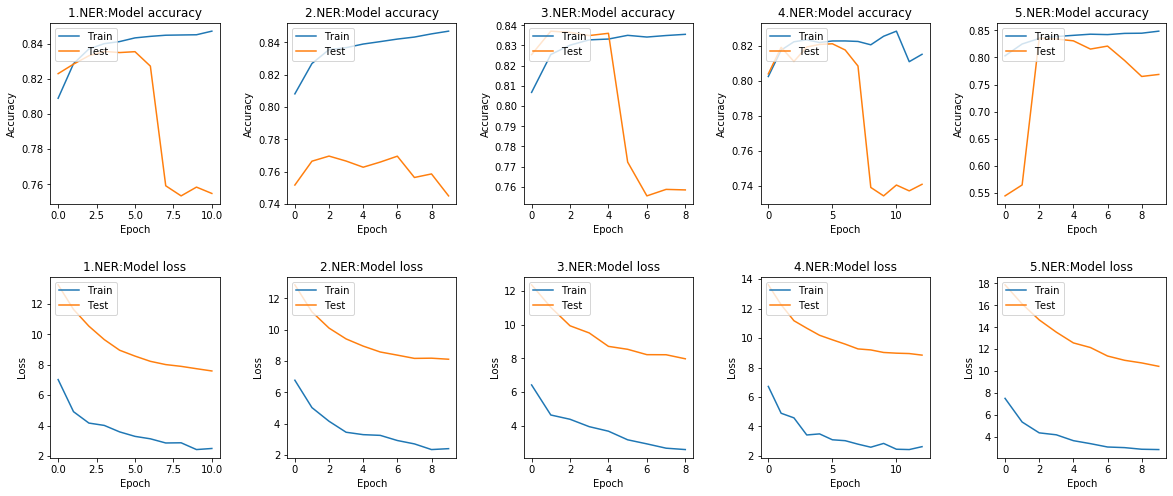

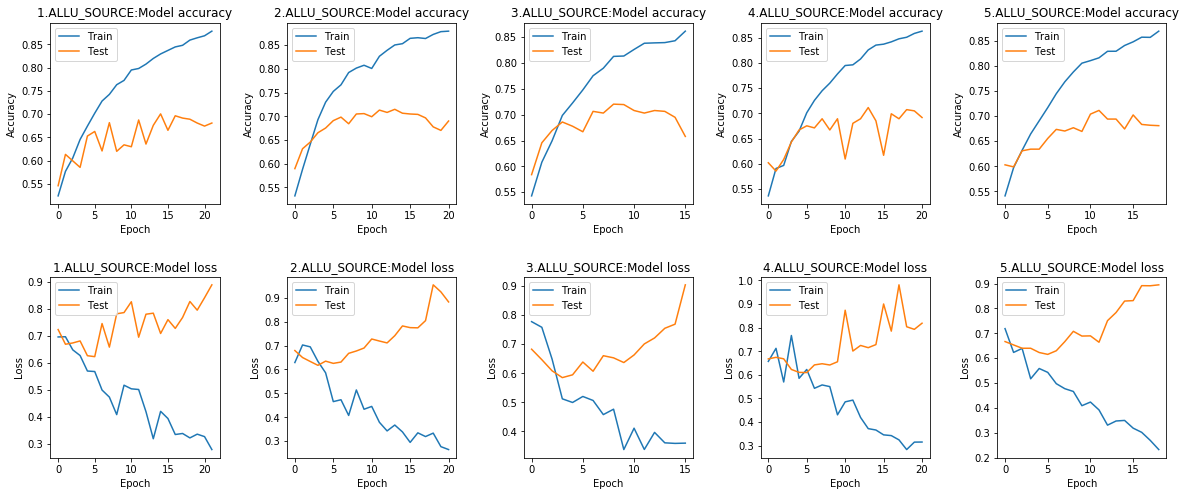

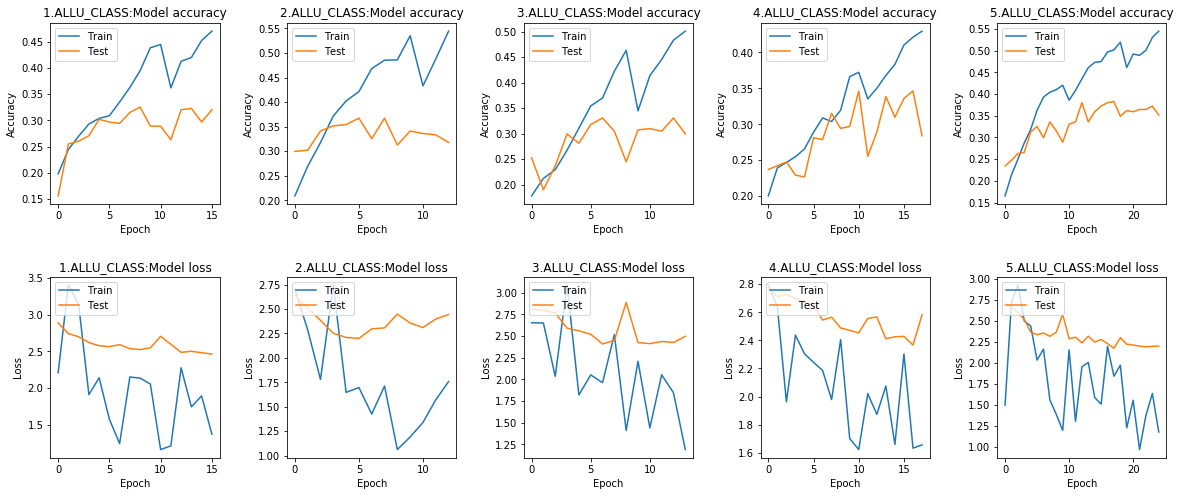

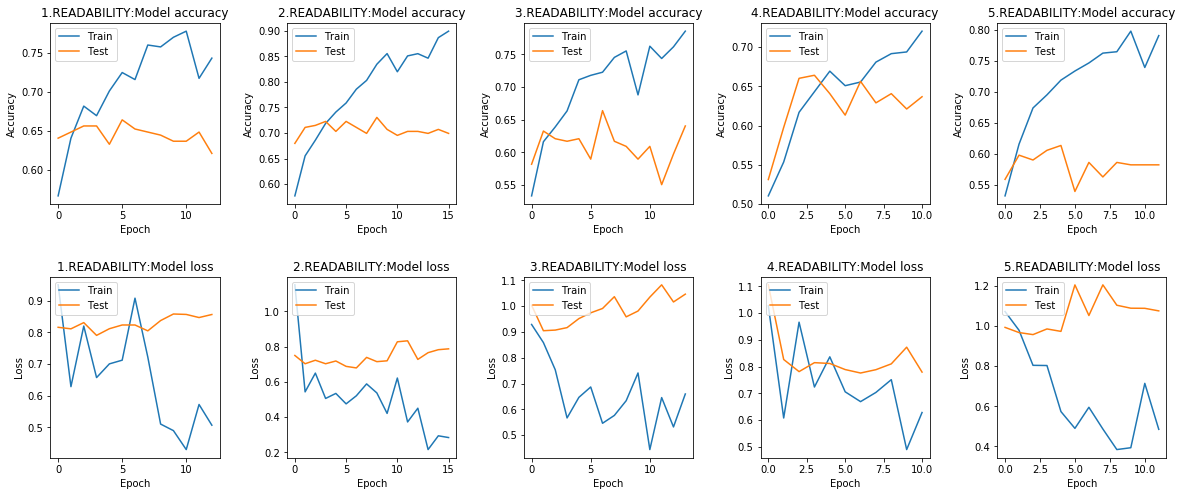

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)

NER	[0.8311209  0.42350322 0.28048643 0.33532972]
ALLU_SOURCE	0.43099388888888895
ALLU_CLASS	[0.20242567 0.21843482 0.36729242 0.16710555]
READABILITY	[0.590904   0.63389549 0.59941987 0.57913965]


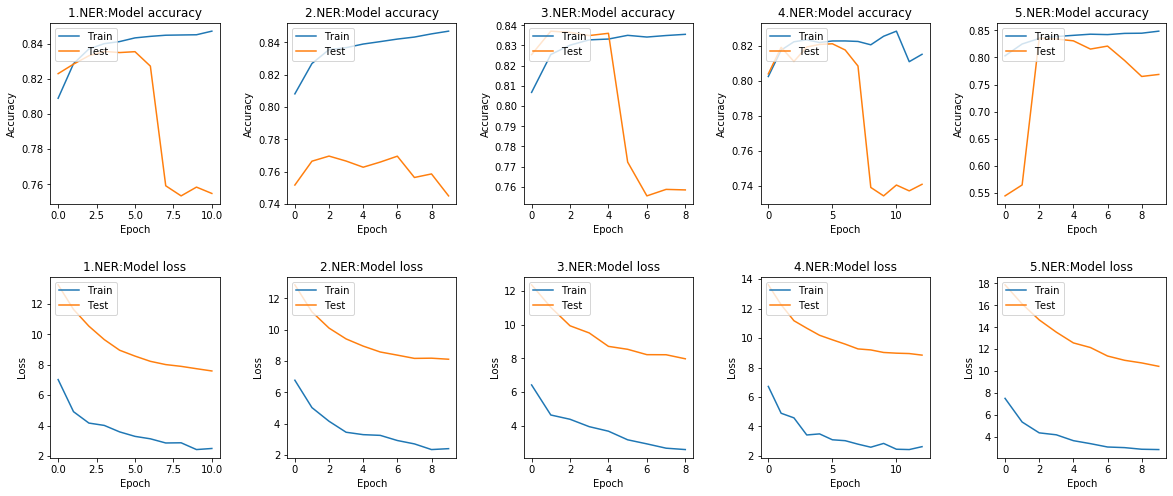

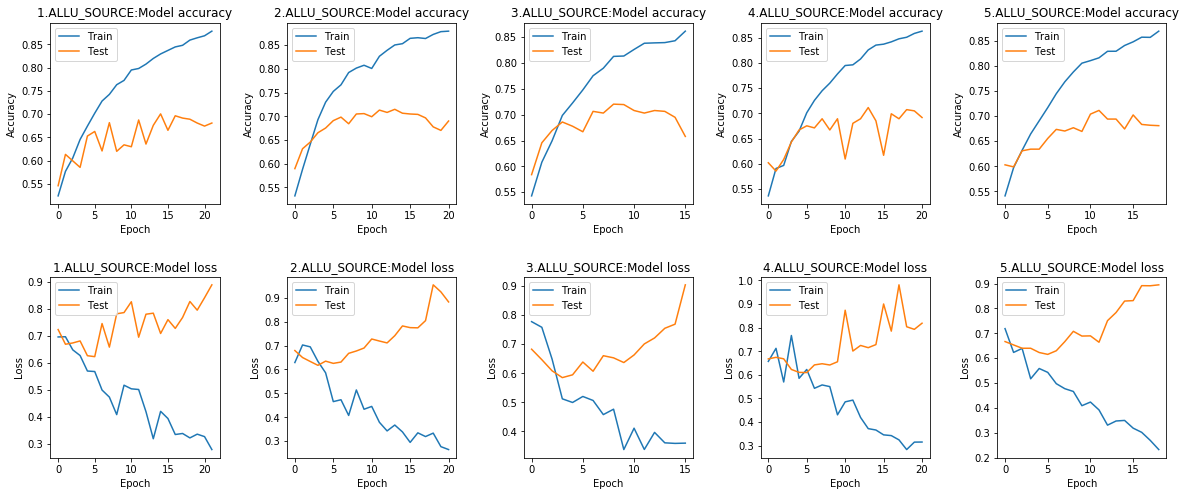

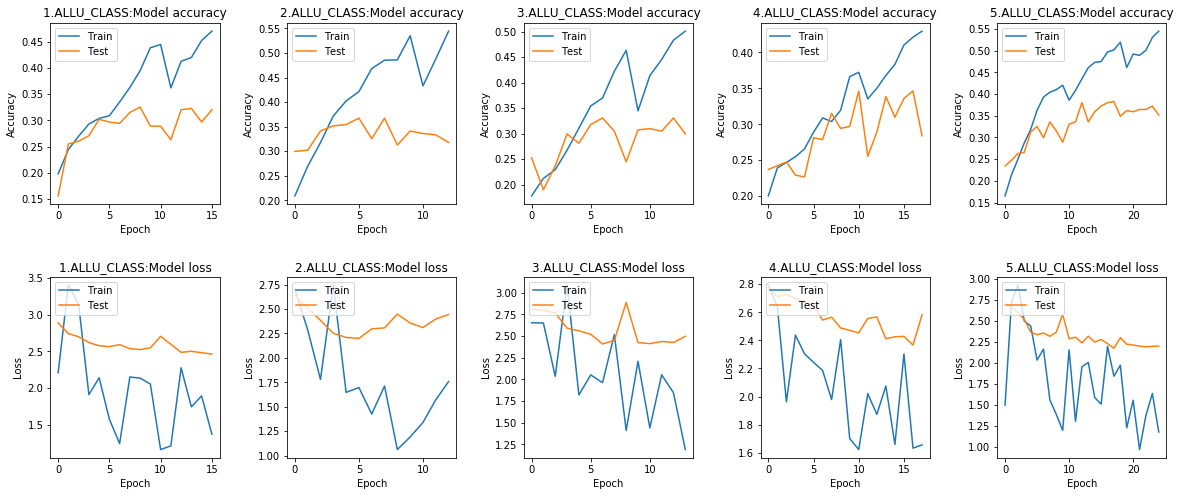

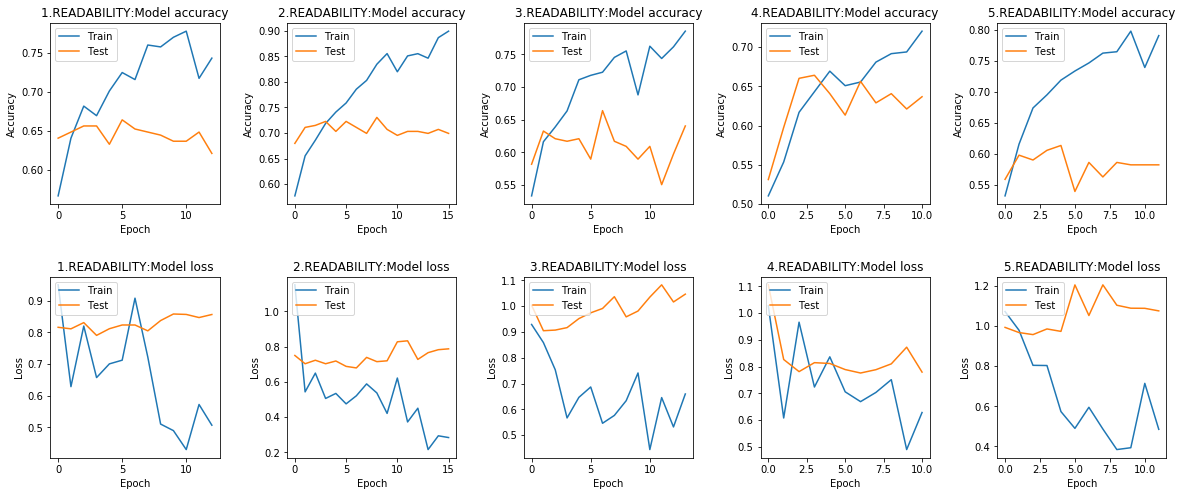

In [6]:
compute_mean_metrics(final_res)
plot_final_res(final_res)